In [3]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd

In [ ]:
sv1849 = [283,157,192,249,259,226,352,97,111,8,235,92]
sv1854 = [371, 161, 148, 362, 244, 237, 282, 59, 171, 9, 240, 174]

lsv1849 = [256,267,312,257,318,446,143,193,243,215,544,187,153,81,113,176]
lsv1854 = [113,174,270,93,210,388,92,58,117,49,193,303,142,48,165,132]

sv_death = sv1849 + sv1854
lsv_death = lsv1849 + lsv1854

sv_area = [f"sv_{i}" for i in range(1, len(sv1849)+1)] + [f"sv_{i}" for i in range(1, len(sv1854)+1)]
lsv_area = [f"sv_{i}" for i in range(1, len(lsv1849)+1)] + [f"sv_{i}" for i in range(1, len(lsv1854)+1)]

sv_year = [1849 for i in range(0, len(sv1849))] + [1854 for i in range(0, len(sv1854))]
lsv_year = [1849 for i in range(0, len(lsv1849))] + [1854 for i in range(0, len(lsv1854))]

sv = pd.DataFrame(
    {
        "area": sv_area,
        "year": sv_year,
        "death": sv_death,
        "LSV": 0,
        "company": "Southwark and Vauxhall"
    }
)

lsv = pd.DataFrame(
    {
        "area": lsv_area,
        "year": lsv_year,
        "death": lsv_death,
        "LSV": 1,
        "company": "Lambeth & Southwark and Vauxhall"
    }
)

JS_df = pd.concat(
    [sv, lsv], 
    ignore_index=True
)

JS_sum = JS_df.groupby(
    ['company', 'LSV', 'year'], 
    as_index=False
).death.sum()


In [ ]:
JS_df.head(3)

In [ ]:
JS_sum.head(3)

In [ ]:
import seaborn as sns

sns.pointplot(
    data=JS_sum,
    x="year",
    y="death",
    hue="company",
);

In [ ]:
JS_grp_summary = pd.pivot_table(
    JS_sum,
    index="company",
    columns="year",
    values="death",
    aggfunc="sum"
)

JS_grp_summary


In [ ]:
JS_grp_summary.columns

In [ ]:
JS_grp_summary["gap"] = JS_grp_summary[1854] - JS_grp_summary[1849]
JS_grp_summary["gap_rate"] = JS_grp_summary[1854]/JS_grp_summary[1849] - 1

In [ ]:
JS_grp_summary

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
JS_sum

In [ ]:
JS_sum["D1854"] = JS_sum["year"].apply(
    lambda x: 1 if x == 1854 else 0
)

JS_sum["D1854_LSV"] = JS_sum["D1854"] * JS_sum["LSV"]

JS_sum

In [ ]:
JS_did = smf.ols(
    formula="death ~ LSV + D1854 + D1854_LSV",
    data=JS_sum
).fit()


In [ ]:
JS_did.summary().tables[1]

In [ ]:
JS_df.head()

In [ ]:
JS_df["D1854"] = JS_df["year"].apply(
    lambda x: 1 if x == 1854 else 0
)

JS_df["D1854_LSV"] = JS_df["D1854"] * JS_df["LSV"]

JS_df.head()

In [ ]:
JS_did_area = smf.ols(
    formula="death ~ LSV + D1854 + D1854_LSV + area",
    data=JS_df
).fit()


In [ ]:
JS_did_area.summary().tables[1]

In [ ]:
import numpy as np

JS_df["log_death"] = np.log(JS_df['death'])

JS_df.head(3)

In [ ]:
JS_did_area_log = smf.ols(
    formula="log_death ~ LSV + D1854 + D1854_LSV + area",
    data=JS_df
).fit()

JS_did_area_log.summary().tables[1]

In [8]:
JS_df.head(3)

,area,year,death,LSV,company
0,sv_1,1849,283,0,Southwark and Vauxhall
1,sv_2,1849,157,0,Southwark and Vauxhall
2,sv_3,1849,192,0,Southwark and Vauxhall


In [9]:
JS_sum.head(3)

,company,LSV,year,death
0,Lambeth & Southwark and Vauxhall,1,1849,3904
1,Lambeth & Southwark and Vauxhall,1,1854,2547
2,Southwark and Vauxhall,0,1849,2261


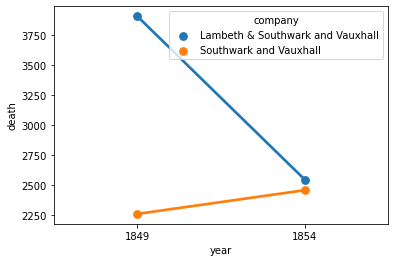

In [21]:
import seaborn as sns

sns.pointplot(
    data=JS_sum,
    x="year",
    y="death",
    hue="company",
);

In [28]:
JS_grp_summary = pd.pivot_table(
    JS_sum,
    index="company",
    columns="year",
    values="death",
    aggfunc="sum"
)

JS_grp_summary


year,1849,1854
company,,
Lambeth & Southwark and Vauxhall,3904,2547
Southwark and Vauxhall,2261,2458


In [29]:
JS_grp_summary.columns

Int64Index([1849, 1854], dtype='int64', name='year')

In [32]:
JS_grp_summary["gap"] = JS_grp_summary[1854] - JS_grp_summary[1849]
JS_grp_summary["gap_rate"] = JS_grp_summary[1854]/JS_grp_summary[1849] - 1

In [33]:
JS_grp_summary

year,1849,1854,gap,gap_rate
company,,,,
Lambeth & Southwark and Vauxhall,3904,2547,-1357,-0.347592
Southwark and Vauxhall,2261,2458,197,0.087130


In [35]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [36]:
JS_sum

,company,LSV,year,death
0,Lambeth & Southwark and Vauxhall,1,1849,3904
1,Lambeth & Southwark and Vauxhall,1,1854,2547
2,Southwark and Vauxhall,0,1849,2261
3,Southwark and Vauxhall,0,1854,2458


In [44]:
JS_sum["D1854"] = JS_sum["year"].apply(
    lambda x: 1 if x == 1854 else 0
)

JS_sum["D1854_LSV"] = JS_sum["D1854"] * JS_sum["LSV"]

JS_sum

,company,LSV,year,death,D1854,D1854_LSV
0,Lambeth & Southwark and Vauxhall,1,1849,3904,0,0
1,Lambeth & Southwark and Vauxhall,1,1854,2547,1,1
2,Southwark and Vauxhall,0,1849,2261,0,0
3,Southwark and Vauxhall,0,1854,2458,1,0


In [47]:
JS_did = smf.ols(
    formula="death ~ LSV + D1854 + D1854_LSV",
    data=JS_sum
).fit()


In [49]:
JS_did.summary().tables[1]

/Users/akifumiabe/.conda/envs/cat-in-the-dat-ii/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2261.0000,inf,0,nan,nan,nan
LSV,1643.0000,inf,0,nan,nan,nan
D1854,197.0000,inf,0,nan,nan,nan
D1854_LSV,-1554.0000,inf,-0,nan,nan,nan


In [52]:
JS_df.head()

,area,year,death,LSV,company
0,sv_1,1849,283,0,Southwark and Vauxhall
1,sv_2,1849,157,0,Southwark and Vauxhall
2,sv_3,1849,192,0,Southwark and Vauxhall
3,sv_4,1849,249,0,Southwark and Vauxhall
4,sv_5,1849,259,0,Southwark and Vauxhall


In [54]:
JS_df["D1854"] = JS_df["year"].apply(
    lambda x: 1 if x == 1854 else 0
)

JS_df["D1854_LSV"] = JS_df["D1854"] * JS_df["LSV"]

JS_df.head()

,area,year,death,LSV,company,D1854,D1854_LSV
0,sv_1,1849,283,0,Southwark and Vauxhall,0,0
1,sv_2,1849,157,0,Southwark and Vauxhall,0,0
2,sv_3,1849,192,0,Southwark and Vauxhall,0,0
3,sv_4,1849,249,0,Southwark and Vauxhall,0,0
4,sv_5,1849,259,0,Southwark and Vauxhall,0,0


In [56]:
JS_did_area = smf.ols(
    formula="death ~ LSV + D1854 + D1854_LSV + area",
    data=JS_df
).fit()


In [57]:
JS_did_area.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,232.5000,47.609,4.884,0.000,136.035,328.965
area[T.sv_10],-185.5000,60.221,-3.080,0.004,-307.519,-63.481
area[T.sv_11],47.2500,60.221,0.785,0.438,-74.769,169.269
area[T.sv_12],-66.7500,60.221,-1.108,0.275,-188.769,55.269
area[T.sv_13],-123.2917,74.773,-1.649,0.108,-274.796,28.212
area[T.sv_14],-206.2917,74.773,-2.759,0.009,-357.796,-54.788
area[T.sv_15],-131.7917,74.773,-1.763,0.086,-283.296,19.712
area[T.sv_16],-116.7917,74.773,-1.562,0.127,-268.296,34.712
area[T.sv_2],-66.0000,60.221,-1.096,0.280,-188.019,56.019
area[T.sv_3],-25.2500,60.221,-0.419,0.677,-147.269,96.769


In [58]:
import numpy as np

JS_df["log_death"] = np.log(JS_df['death'])

JS_df.head(3)

,area,year,death,LSV,company,D1854,D1854_LSV,log_death
0,sv_1,1849,283,0,Southwark and Vauxhall,0,0,5.645447
1,sv_2,1849,157,0,Southwark and Vauxhall,0,0,5.056246
2,sv_3,1849,192,0,Southwark and Vauxhall,0,0,5.257495


In [60]:
JS_did_area_log = smf.ols(
    formula="log_death ~ LSV + D1854 + D1854_LSV + area",
    data=JS_df
).fit()

JS_did_area_log.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,5.2918,0.311,17.036,0.000,4.662,5.921
area[T.sv_10],-2.0738,0.393,-5.278,0.000,-2.870,-1.278
area[T.sv_11],0.1669,0.393,0.425,0.673,-0.629,0.963
area[T.sv_12],-0.3021,0.393,-0.769,0.447,-1.098,0.494
area[T.sv_13],-0.5953,0.488,-1.220,0.230,-1.584,0.393
area[T.sv_14],-1.4556,0.488,-2.984,0.005,-2.444,-0.467
area[T.sv_15],-0.6717,0.488,-1.377,0.177,-1.660,0.317
area[T.sv_16],-0.5617,0.488,-1.151,0.257,-1.550,0.427
area[T.sv_2],-0.2376,0.393,-0.605,0.549,-1.034,0.559
area[T.sv_3],-0.0595,0.393,-0.151,0.880,-0.856,0.737
